In [3]:
words = open("names.txt", 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
min(len(word) for word in words)

2

In [5]:
max(len(word) for word in words)

15

In [6]:
bigram_frequency = {}
for word in words[:3]:
    chars = ["<S>"] + list(word)+["<E>"]
    for ch, ch1 in zip(chars,chars[1:]):
        bigram = (ch,ch1)
        bigram_frequency[bigram] = bigram_frequency.get(bigram, 0)+1
        # print(ch, ch1)

bigram_frequency.items()

dict_items([(('<S>', 'e'), 1), (('e', 'm'), 1), (('m', 'm'), 1), (('m', 'a'), 1), (('a', '<E>'), 3), (('<S>', 'o'), 1), (('o', 'l'), 1), (('l', 'i'), 1), (('i', 'v'), 1), (('v', 'i'), 1), (('i', 'a'), 1), (('<S>', 'a'), 1), (('a', 'v'), 1), (('v', 'a'), 1)])

In [7]:
sorted(bigram_frequency.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 3),
 (('<S>', 'e'), 1),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('l', 'i'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('i', 'a'), 1),
 (('<S>', 'a'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1)]

In [17]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)
chars = sorted(list(set("".join(words))))
c2i = {c:i+1 for i,c in enumerate(chars)}
c2i["."]=0
c2i
i2c = {c:i for i,c in c2i.items()}
i2c

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [20]:
for word in words:
    chars = ["."] + list(word)+["."]
    for ch, ch1 in zip(chars,chars[1:]):
        ix = c2i[ch]
        iy = c2i[ch1]
        N[ix][iy]+=1 
        # bigram = (ch,ch1)
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

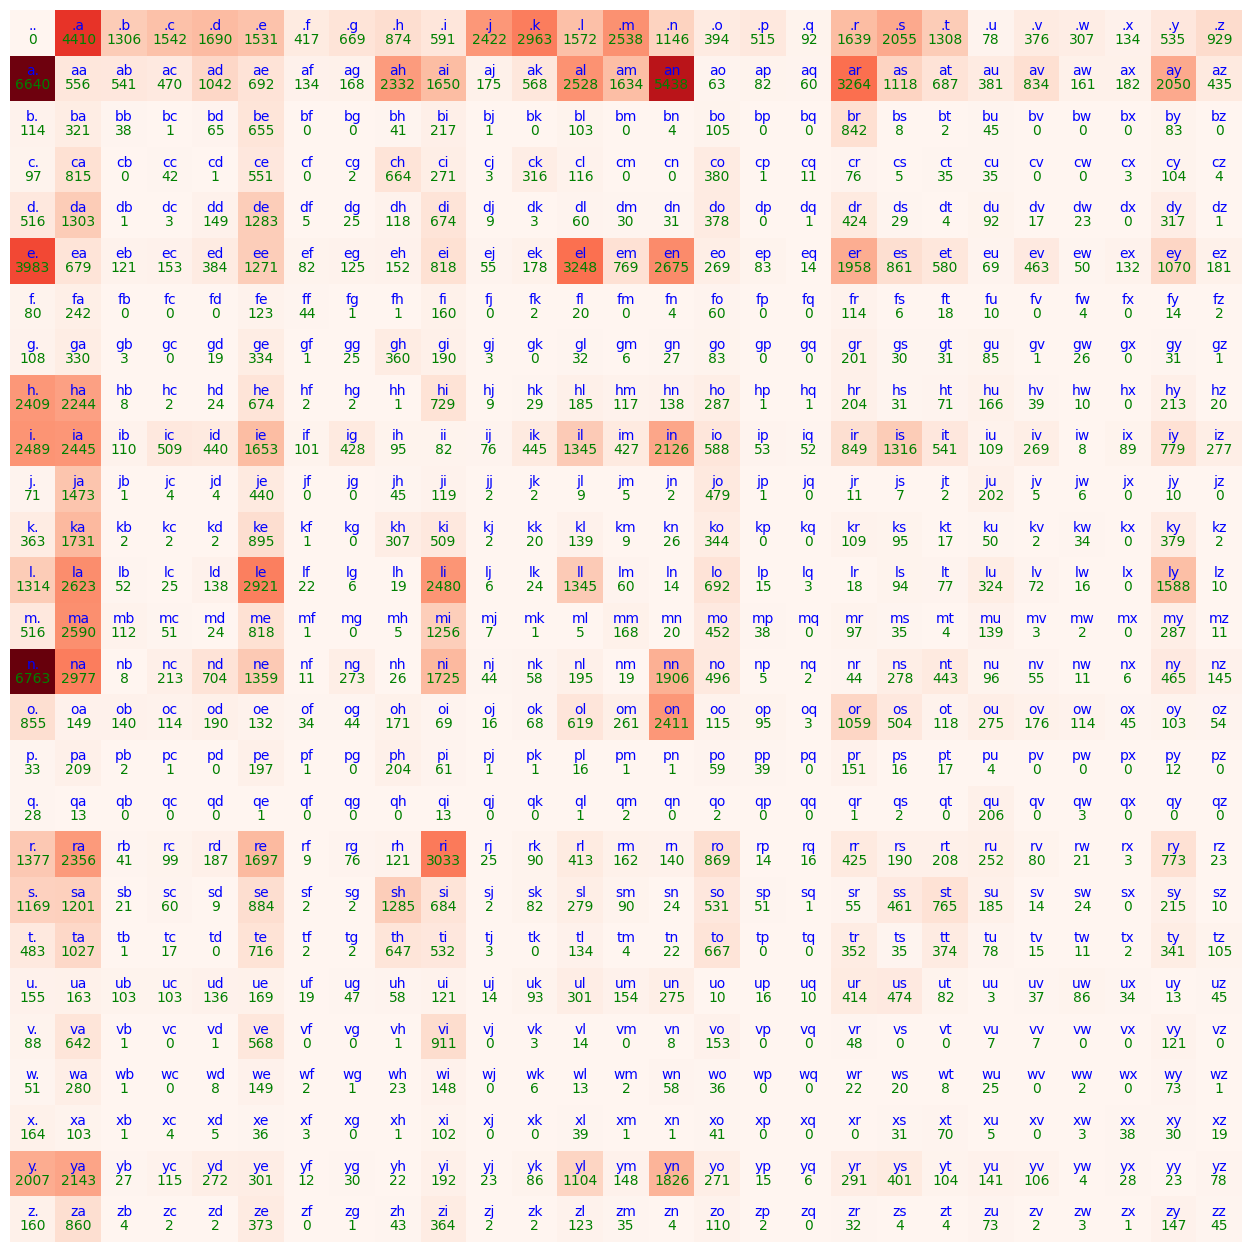

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
plt.imshow(N, cmap="Reds")
for i in range(27):
    for j in range(27):
        # print(i,j)
        # print(i2c[i],i2c[j])
        char = i2c[i]+i2c[j]
        # print(N[i][j])
        plt.text(j,i,char, ha = "center", va = "bottom", color ="Blue")
        plt.text(j,i,N[i,j].item(), ha = "center", va = "top", color = "green")
plt.axis('off')

In [25]:
N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [31]:
# this looks good we have the probablities
# Now we want to sample characters based on the their probabaliites.
# It not like that is should take the most probabaly alway, because that make the probablities binary.
# the ida is that if i have to pic a character for 10 times, than the characters whose probabliy is less  
# should accur less frequently.

# torch.multinomial is a funtion which can output an index with frequecny proportioanl to its probabality
# but the seqence in which the index is given as output can be differnt, whcih we would want to be random

# let us leverage the torch multinomal and random funtions to sample

g = torch.Generator().manual_seed(8732648)
random_numbers = torch.rand(3, generator =g)
probablity  = random_numbers/random_numbers.sum()
probablity

tensor([0.6151, 0.1591, 0.2258])

In [ ]:
# this is a random generated sample probabality
# 3 now lets use torch.multinomial to generate indexes in the same frequency

index_smapled = torch.multinomial(probablity, num_sample = 10, replacement = True)
